In [1]:
#load libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import requests


import warnings
#disable all warnings
warnings.filterwarnings("ignore")
#enable warnings again (optional)
#warnings.filterwarnings("default")

In [2]:
#dataset import

nba_salaries_df = pd.read_csv('nba_salaries.csv')
nba_salaries_df.head()

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,curryst01
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,walljo01
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,westbru01
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,jamesle01
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,duranke01


## Assessing the Data

In [3]:
# shape of the data
nba_salaries_df.shape

(467, 32)

In [4]:
#Taking a look at what data types we are dealing with, from which we most likely will remove player name, position (maybe) and team name because
#may not need them to predict our goal, since we are trying to base it off of player performance stats
nba_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         467 non-null    int64  
 1   Player Name        467 non-null    object 
 2   Salary             467 non-null    int64  
 3   Position           467 non-null    object 
 4   Age                467 non-null    int64  
 5   Team               467 non-null    object 
 6   GP                 467 non-null    int64  
 7   GS                 467 non-null    int64  
 8   MP                 467 non-null    float64
 9   FG                 467 non-null    float64
 10  FGA                467 non-null    float64
 11  FG%                466 non-null    float64
 12  3P                 467 non-null    float64
 13  3PA                467 non-null    float64
 14  3P%                454 non-null    float64
 15  2P                 467 non-null    float64
 16  2PA                467 non

In [5]:
missing_values = nba_salaries_df.isnull().sum()

# This will print the count of missing values for each column 
# looking for ways to handle missing values
print(missing_values)

Unnamed: 0            0
Player Name           0
Salary                0
Position              0
Age                   0
Team                  0
GP                    0
GS                    0
MP                    0
FG                    0
FGA                   0
FG%                   1
3P                    0
3PA                   0
3P%                  13
2P                    0
2PA                   0
2P%                   4
eFG%                  1
FT                    0
FTA                   0
FT%                  23
ORB                   0
DRB                   0
TRB                   0
AST                   0
STL                   0
BLK                   0
TOV                   0
PF                    0
PTS                   0
Player-additional     0
dtype: int64


In [6]:
# check for duplicate rows
nba_salaries_df.duplicated().sum()


0

## Observations from Assessing the Data

After assessing the data, it was observed that:

1. The data consists of 467 Instances and 32 Features
2. Out of the 32 columns, 3 columns had missing values
3. Missing values were less than 4.5% of the data in their columns
4. There are no repeated/duplicate rows
5. Some players have played a few amount of games which may lead to skewed results

The following issues will be addressed during data cleaning



## Data Visualtion




## Data Visualtion




In [7]:
# count, mean, std, min, max, lower quartile, upper quartile 
nba_salaries_df.describe()

,Unnamed: 0,Salary,Age,GP,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,467.000000,4.670000e+02,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,466.000000,467.000000,...,444.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,233.000000,8.416599e+06,25.820128,48.233405,22.650964,19.871306,3.351392,7.117773,0.465009,0.996574,...,0.753489,0.866809,2.662099,3.528051,2.107709,0.610493,0.379015,1.114133,1.702784,9.129979
std,134.955548,1.070812e+07,4.275113,24.807740,27.094577,9.548684,2.457836,5.020700,0.109547,0.880468,...,0.148659,0.746976,1.707984,2.277160,1.957517,0.399083,0.364387,0.830051,0.776957,6.906006
min,0.000000,5.849000e+03,19.000000,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.500000,1.782621e+06,23.000000,31.000000,1.000000,12.500000,1.600000,3.300000,0.417000,0.300000,...,0.691000,0.400000,1.400000,1.900000,0.800000,0.300000,0.100000,0.500000,1.200000,4.100000
50%,233.000000,3.722040e+06,25.000000,55.000000,8.000000,19.200000,2.700000,5.800000,0.455000,0.800000,...,0.769000,0.700000,2.300000,3.000000,1.400000,0.600000,0.300000,0.900000,1.700000,7.100000
75%,349.500000,1.063354e+07,29.000000,68.500000,45.500000,28.300000,4.300000,9.400000,0.507500,1.500000,...,0.844000,1.100000,3.500000,4.500000,2.900000,0.800000,0.500000,1.500000,2.200000,11.700000
max,466.000000,4.807001e+07,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,4.900000,...,1.000000,5.100000,9.600000,12.500000,10.700000,3.000000,2.500000,4.100000,5.000000,33.100000


In [8]:
#calculate the correlation matrix. 
#Tip: If you set numeric_only=False, pandas will attempt to compute correlations for all columns regardless of their data types. 
#However, if any non-numeric columns are present, pandas will raise a TypeError because it cannot compute correlations for non-numeric data types.

corr_matrix = nba_salaries_df.corr(numeric_only=True)
corr_matrix

,Unnamed: 0,Salary,Age,GP,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Unnamed: 0,1.000000,-0.824079,-0.403669,-0.571609,-0.646612,-0.694943,-0.667117,-0.666457,-0.138060,-0.482847,...,-0.145993,-0.278767,-0.585667,-0.529183,-0.522144,-0.488460,-0.329643,-0.586945,-0.493176,-0.664812
Salary,-0.824079,1.000000,0.416072,0.341707,0.602267,0.642099,0.720260,0.706393,0.111029,0.480239,...,0.161174,0.219490,0.576596,0.503633,0.593971,0.449517,0.301344,0.646808,0.406488,0.727597
Age,-0.403669,0.416072,1.000000,0.043110,0.099072,0.127646,0.087944,0.083221,0.042169,0.154619,...,0.103233,-0.030366,0.110007,0.072424,0.170663,0.086512,0.046612,0.075886,0.074900,0.102828
GP,-0.571609,0.341707,0.043110,1.000000,0.629734,0.639889,0.501598,0.497235,0.199292,0.398246,...,0.142382,0.305178,0.492522,0.469432,0.331682,0.402348,0.301602,0.399205,0.491764,0.496789
GS,-0.646612,0.602267,0.099072,0.629734,1.000000,0.827600,0.753933,0.744924,0.160828,0.521626,...,0.159736,0.367538,0.658787,0.613861,0.590743,0.569259,0.373324,0.647149,0.578420,0.747097
MP,-0.694943,0.642099,0.127646,0.639889,0.827600,1.000000,0.878638,0.882952,0.150784,0.686140,...,0.206092,0.360212,0.749694,0.679031,0.749917,0.719819,0.360211,0.796087,0.743262,0.873756
FG,-0.667117,0.720260,0.087944,0.501598,0.753933,0.878638,1.000000,0.978093,0.221990,0.659661,...,0.195888,0.332063,0.734536,0.658497,0.722249,0.572662,0.343581,0.857600,0.612159,0.991842
FGA,-0.666457,0.706393,0.083221,0.497235,0.744924,0.882952,0.978093,1.000000,0.071093,0.743534,...,0.250513,0.216247,0.666635,0.569441,0.756695,0.590902,0.246129,0.859645,0.571342,0.982185
FG%,-0.138060,0.111029,0.042169,0.199292,0.160828,0.150784,0.221990,0.071093,1.000000,-0.132869,...,-0.246144,0.463021,0.333802,0.403184,-0.001509,0.008259,0.372792,0.148358,0.316570,0.175287
3P,-0.482847,0.480239,0.154619,0.398246,0.521626,0.686140,0.659661,0.743534,-0.132869,1.000000,...,0.331510,-0.145369,0.312107,0.185671,0.563187,0.457771,-0.054938,0.554434,0.358595,0.701063


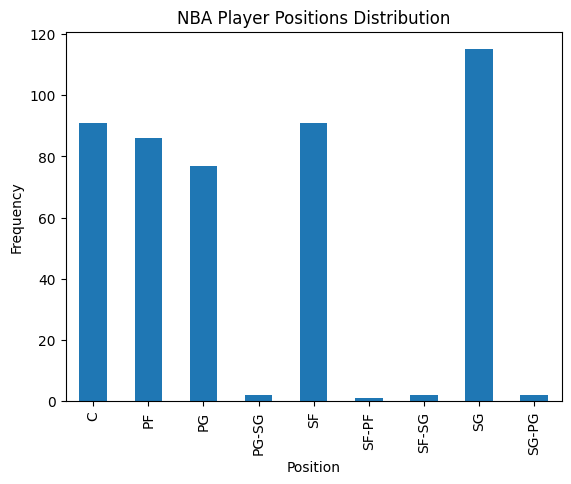

In [9]:
#First, we get the count of each position and sort them
position_counts = nba_salaries_df['Position'].value_counts().sort_index()

#Create a bar chart
position_counts.plot(kind='bar')

#Set the title and labels
plt.title('NBA Player Positions Distribution')
plt.xlabel('Position')
plt.ylabel('Frequency')

#Show the plot
plt.show()

       Unnamed: 0        Salary         Age          GP          GS  \
count  467.000000  4.670000e+02  467.000000  467.000000  467.000000   
mean   233.000000  8.416599e+06   25.820128   48.233405   22.650964   
std    134.955548  1.070812e+07    4.275113   24.807740   27.094577   
min      0.000000  5.849000e+03   19.000000    1.000000    0.000000   
25%    116.500000  1.782621e+06   23.000000   31.000000    1.000000   
50%    233.000000  3.722040e+06   25.000000   55.000000    8.000000   
75%    349.500000  1.063354e+07   29.000000   68.500000   45.500000   
max    466.000000  4.807001e+07   42.000000   83.000000   83.000000   

               MP          FG         FGA         FG%          3P  ...  \
count  467.000000  467.000000  467.000000  466.000000  467.000000  ...   
mean    19.871306    3.351392    7.117773    0.465009    0.996574  ...   
std      9.548684    2.457836    5.020700    0.109547    0.880468  ...   
min      1.800000    0.000000    0.000000    0.000000    0.00000

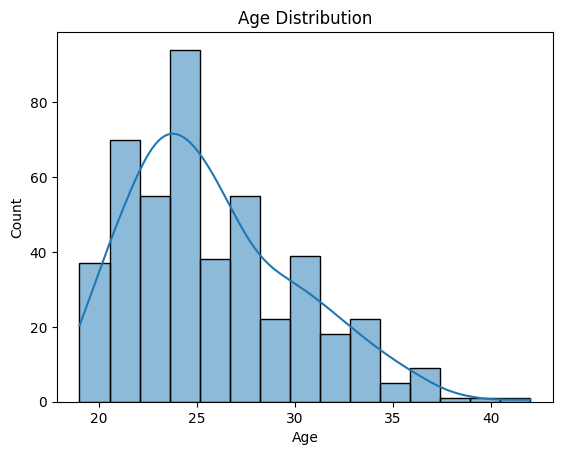

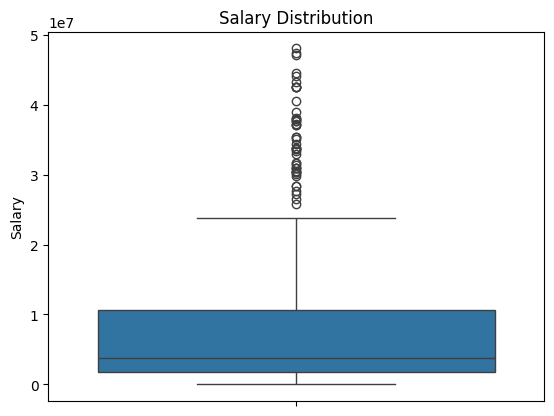

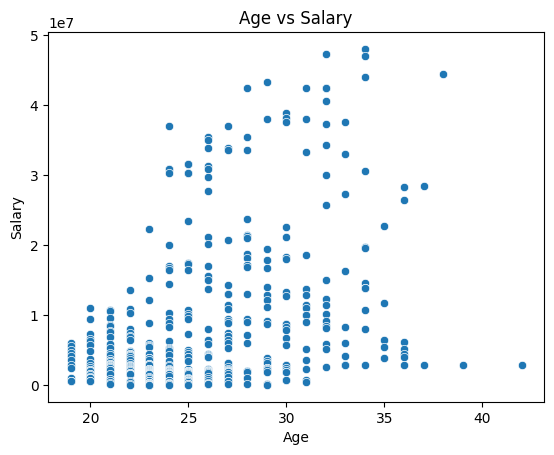

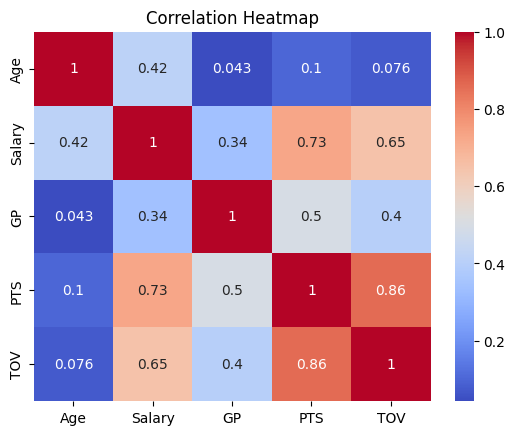

In [10]:
print(nba_salaries_df.describe())
print(nba_salaries_df.info())

# EDA Graphs
# Histogram for Age Distribution
sns.histplot(nba_salaries_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot for Salary Distribution
sns.boxplot(y=nba_salaries_df['Salary'])
plt.title('Salary Distribution')
plt.show()

# Scatter plot for Age vs Salary
sns.scatterplot(x='Age', y='Salary', data=nba_salaries_df)
plt.title('Age vs Salary')
plt.show()

# Correlation Heatmap for selected features
corr_features = ['Age', 'Salary', 'GP', 'PTS', 'TOV']
sns.heatmap(nba_salaries_df[corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

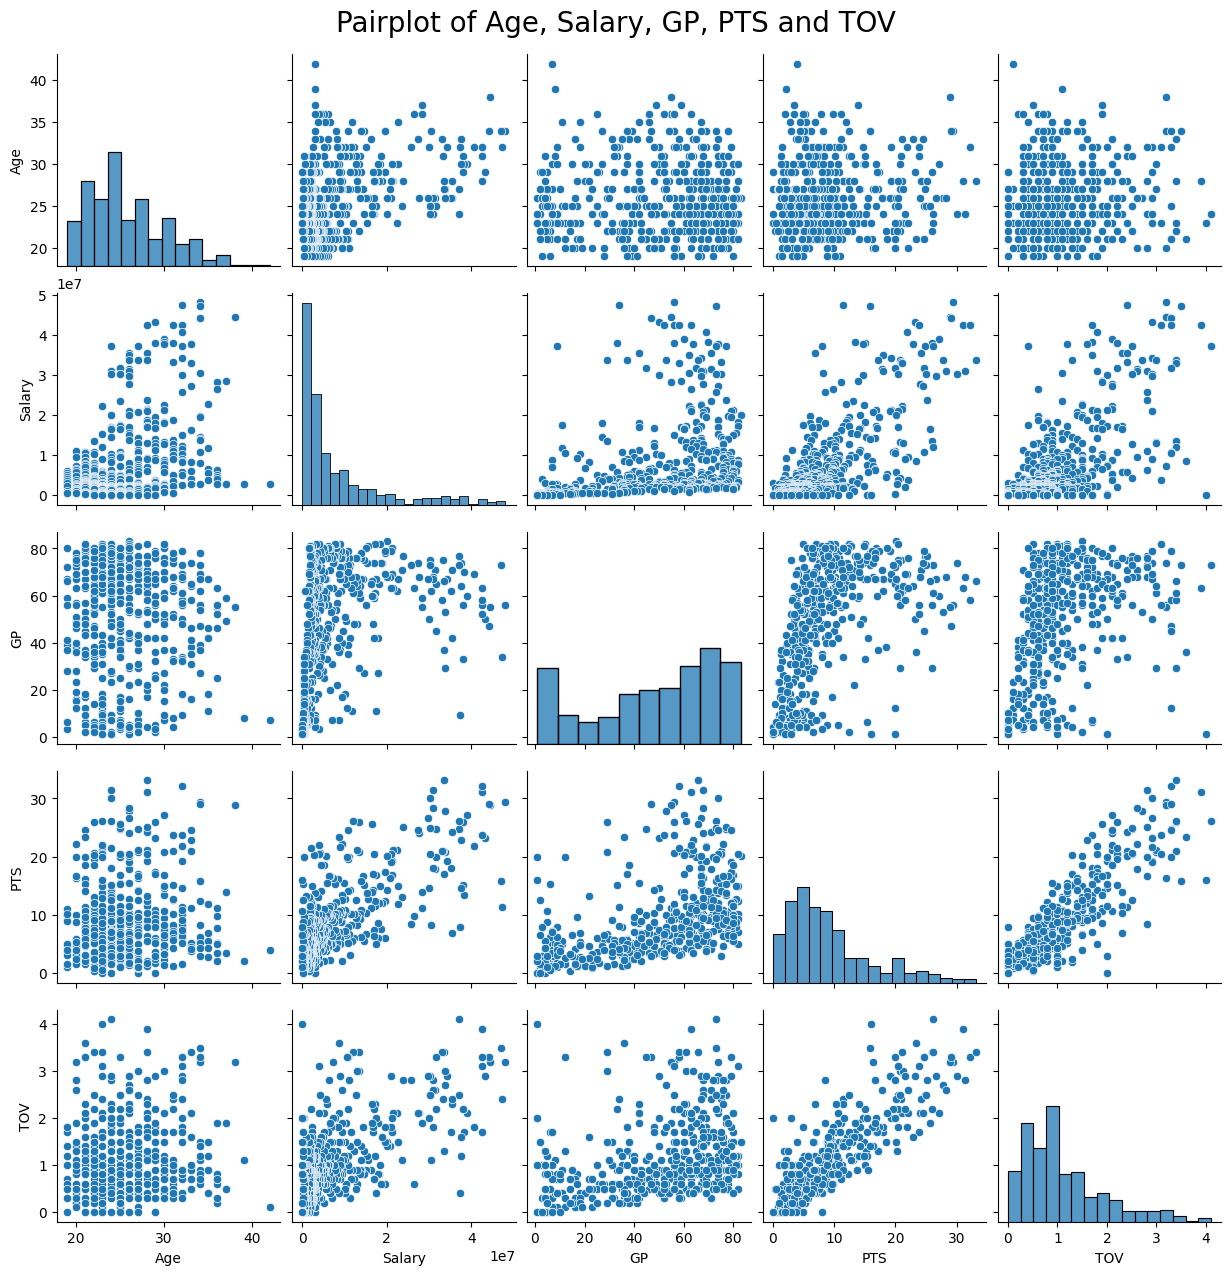

In [11]:
#Selecting only the columns of interest
columns_of_interest = ['Age', 'Salary', 'GP', 'PTS', 'TOV']
data_for_pairplot = nba_salaries_df[columns_of_interest]

#Creating the pairplot
sns.pairplot(data_for_pairplot)

#Adding a title to the pairplot (workaround since seaborn's pairplot doesn't have a direct way to add titles)
plt.suptitle('Pairplot of Age, Salary, GP, PTS and TOV', size=20, y=1.02)

#Showing the plot
plt.show()

## Data Cleaning

1. Handling missing values

In [13]:
#Fill missing values in columns with 0s
columns_to_fill = ['FT%', '3P%', '2P%', 'eFG%', 'FG%']
nba_salaries_df[columns_to_fill] = nba_salaries_df[columns_to_fill].fillna(0)

In [14]:
missing_values = nba_salaries_df.isnull().sum()

# This will print the count of missing values for each column 
# looking for ways to handle missing values
print(missing_values)

Unnamed: 0           0
Player Name          0
Salary               0
Position             0
Age                  0
Team                 0
GP                   0
GS                   0
MP                   0
FG                   0
FGA                  0
FG%                  0
3P                   0
3PA                  0
3P%                  0
2P                   0
2PA                  0
2P%                  0
eFG%                 0
FT                   0
FTA                  0
FT%                  0
ORB                  0
DRB                  0
TRB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PTS                  0
Player-additional    0
dtype: int64


2. Dealing with Outliers

To make our salary predictions more reliable, we're only looking at players who've played in at least 15 games. This helps us avoid the complications from short-term contracts or players who missed a lot of games due to injuries. Focusing on those with more game time gives us a better foundation for our analysis.

In [15]:
less_than_15_games = nba_salaries_df[nba_salaries_df['GP'] < 15].shape[0]

print(f"Number of players who have played less than 15 games: {less_than_15_games}")

Number of players who have played less than 15 games: 75


In [16]:
nba_salaries_df = nba_salaries_df[nba_salaries_df['GP'] >= 15]

#this removes 75 players out of our dataset, making it more refined

## Visualizations (Data Exploration)

In [17]:

# Read data from the CSV file
num_df = nba_salaries_df

# Drop the first unnamed column, "Player Name", "Position", "Team" and "player-additional" columns since they are TEXT
# First, check if there's an unnamed first column and drop it
num_df = num_df.loc[:, ~num_df.columns.str.contains('^Unnamed')]

# Then drop the "Player Name", "Position", "Team" and "player-additional" columns
num_df = num_df.drop(['Player Name', 'Position', 'Team', 'Player-additional'], axis=1, errors='ignore')


In [18]:
# calculate correlation of all player stats (columns) with player salary
num_corr_df = pd.DataFrame({'Salary correlation':num_df.corrwith(num_df['Salary'])[1:]})
num_corr_df



,Salary correlation
Age,0.424177
GP,0.220855
GS,0.572882
MP,0.656676
FG,0.726535
FGA,0.705897
FG%,0.094304
3P,0.470804
3PA,0.475309
3P%,0.078711


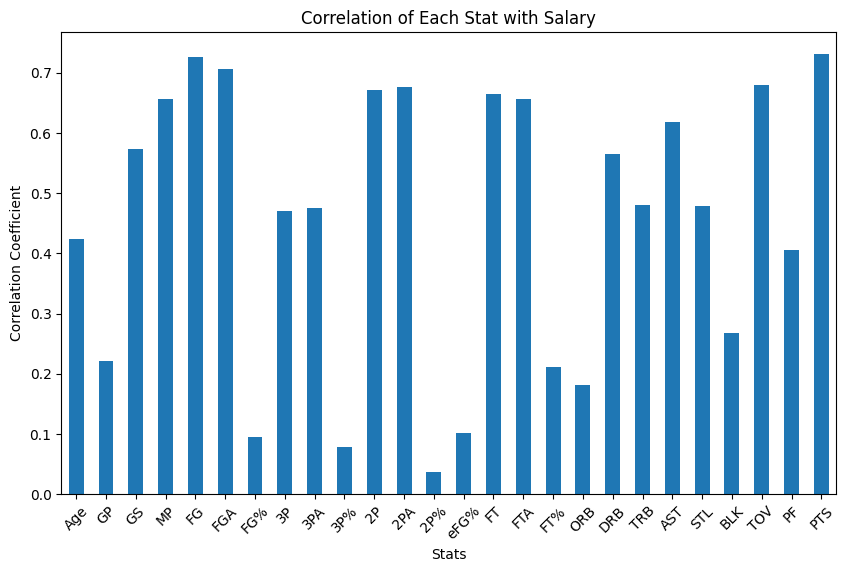

In [19]:
# Now, plotting the 'Salary correlation' as a bar chart
num_corr_df['Salary correlation'].plot(kind='bar', figsize=(10, 6))

plt.title('Correlation of Each Stat with Salary')
plt.xlabel('Stats')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Based on the correlation results between various player stats and their salaries, we can draw some interesting insights:

1.Field Goals (FG) and Points Scored (PTS) have the strongest correlations with salary, with coefficients of approximately 0.73. This suggests that players who score more points, generally through field goals, tend to have higher salaries. It highlights the premium placed on players who can effectively contribute to the team's offense.

2.Minutes Played (MP), Turnovers (TOV), Free Throws (FT), and Field Goal Attempts (FGA) also show strong positive correlations with salary (ranging from 0.65 to 0.68). This indicates that players who are on the floor longer and actively involved in the game, even if it sometimes results in turnovers, are likely to earn more. It reflects the value of players who are central to their team's gameplay.

3.Starting Games (GS), Two-Point Field Goals (2P), and Two-Point Attempts (2PA) have significant correlations with salary as well (around 0.57 to 0.67), underscoring the importance of players who start games and are efficient in two-point shooting.

4.Assists (AST) and Defensive Rebounds (DRB) show moderate to strong correlations with salary (around 0.56 to 0.62), suggesting that players who contribute to ball distribution and defense are also valued, albeit slightly less than top scorers.

5.Age shows a moderate positive correlation of about 0.42 with salary, indicating that experience and maturity might play a role in salary determination, but it's not as significant as performance metrics.

6.Surprisingly, Three-Point Field Goals (3P) and Three-Point Attempts (3PA), despite being crucial in modern basketball, show only moderate correlations with salary (around 0.47). This could suggest that while three-point shooting is important, it might not be as strongly tied to salary as scoring inside the arc or overall scoring ability.

7.Efficiency stats like Field Goal Percentage (FG%), Three-Point Percentage (3P%), and Effective Field Goal Percentage (eFG%) have low correlations with salary (less than 0.1 for percentage stats), indicating that efficiency in shooting does not heavily influence salary. This could be due to the high value placed on players who can score and contribute significantly in volume, regardless of efficiency metrics.

8.Rebounding, both offensive (ORB) and total (TRB), and Blocks (BLK) show lower correlations with salary (below 0.5). This could mean that while these contributions are valuable, they don't impact salary as much as scoring and playmaking abilities.


In summary, the data suggests that scoring ability, especially through field goals and overall points scored, along with playtime and involvement in the game (as indicated by MP, TOV, and FGA), are highly valued in the NBA, directly reflecting in player salaries. Contributions in assists and defense are also recognized but to a slightly lesser extent. Efficiency metrics and specific contributions like three-point shooting, rebounding, and blocking, while important, seem to have a lesser impact on salary decisions.

For our models below, we choose player statistics that are more strongly correlated with salaries. These include:

In [20]:
#strongly correlated stats
num_corr_df[num_corr_df['Salary correlation']>=0.45]

,Salary correlation
GS,0.572882
MP,0.656676
FG,0.726535
FGA,0.705897
3P,0.470804
3PA,0.475309
2P,0.670949
2PA,0.676120
FT,0.664177
FTA,0.657084


Whilst studying the information above, we can notice that Points Scored seems to have a high correlation with Salaries of Players. Lets further visualize this correlation.

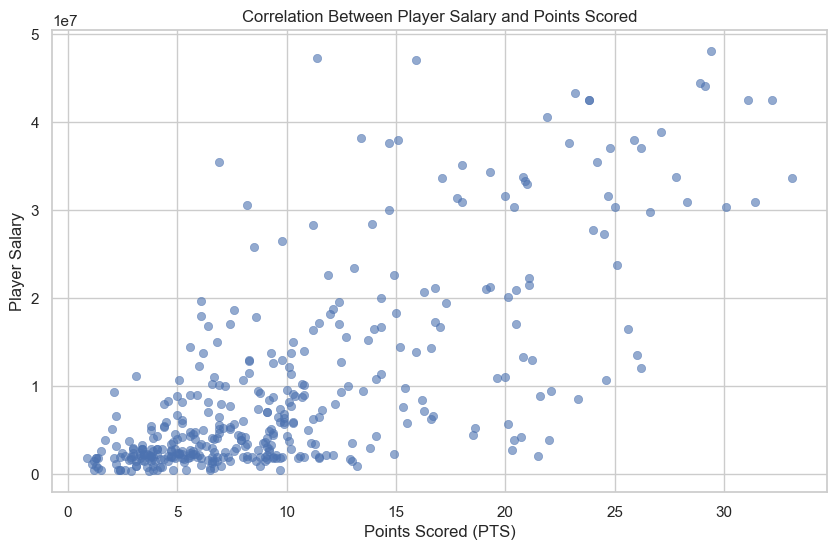

In [21]:
sns.set(style="whitegrid")

# Create a scatter plot of Salary vs. PTS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PTS', y='Salary', data=num_df, alpha=0.6, edgecolor=None)

# Adding title and labels to the plot
plt.title('Correlation Between Player Salary and Points Scored')
plt.xlabel('Points Scored (PTS)')
plt.ylabel('Player Salary')

# Show the plot
plt.show()

it appears there's a noticeable upward trend which implies that players who score more points tend to have higher salaries.

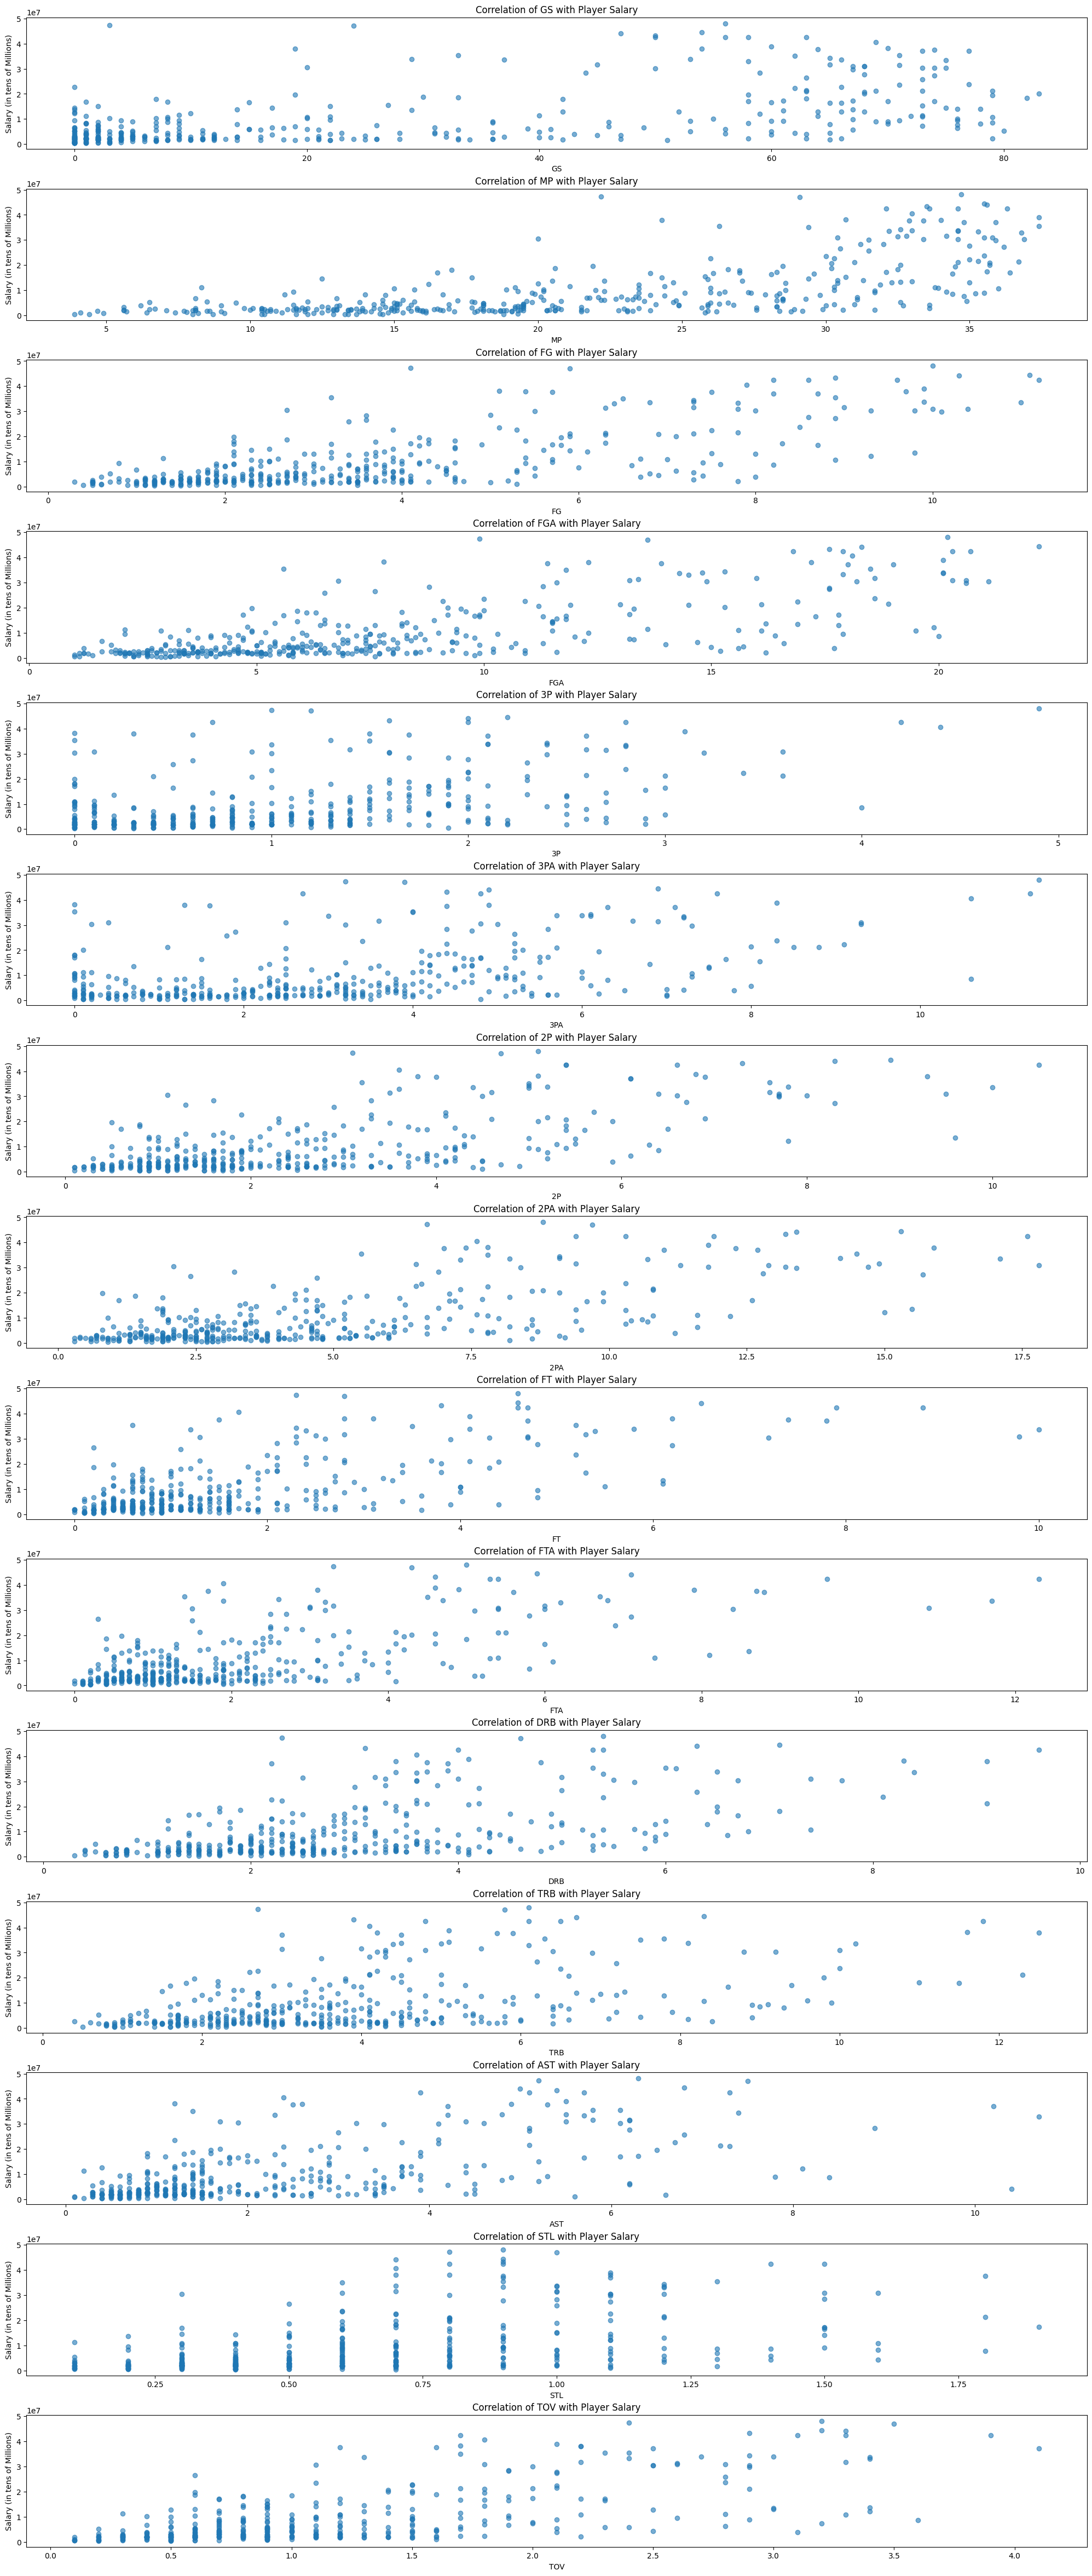

In [22]:
sns.set()
# determine stats that are strongly correlated with player salary
high_corr = num_corr_df[num_corr_df['Salary correlation']>=0.45][:-1]
# create a list of stat names
stats_list = high_corr.index
# loop through different stats
plt.style.use('default')
for stat in range(len(stats_list)):
    plt.subplot(len(stats_list), 1, stat+1)
    # graph scatter plot of graph relative to player salary 
    plt.scatter(num_df[stats_list[stat]], num_df['Salary'], alpha=0.6)
    # add graph title
    plt.gca().title.set_text(f'Correlation of {stats_list[stat]} with Player Salary')
    # label axes
    plt.xlabel(f'{stats_list[stat]}')
    plt.ylabel('Salary (in tens of Millions)')

# adjusting graph size and spacing between subplots
plt.gcf().set_size_inches(25, 60)
plt.gcf().subplots_adjust(hspace=0.3)

## Feature Selection

From our Analysis above, we were able to identify some highly correlated features. These features will now form our feature selection to help train machine learning models below


## 1. Random Forest Regression

In [23]:
# List of features to include in X based on our selection
x_feat_list = ['GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'DRB', 'TRB', 'AST', 'STL', 'TOV', 'PTS']

# The target feature
y_feat = 'Salary'

# Selecting the features for X and the target for y from all_stats_df
x = nba_salaries_df[x_feat_list]  # Features DataFrame
y = nba_salaries_df[y_feat]  # Target Series


In [24]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets
# 20% of data is used for testing and 80% for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(313, 16) (313,) (79, 16) (79,)


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split


# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit GridSearchCV
grid_search.fit(x_train_scaled, y_train)

# Best estimator?
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_rf = best_rf_model.predict(x_test_scaled)

# Calculate MAE, MSE and R² for the best model
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Print results for the best model
print(f'Model: Random Forest Regressor (Best Model)')
print(f'Mean Absolute Error (MAE): {rf_mae:.2f} dollars.')
print(f'Mean Squared Error (MSE): {rf_mse:.4f}')
print(f'R-squared (R2): {rf_r2:.4f}')


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END ma

## 2. Lasso Regression

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


# Feature Scaling (Standardization)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Scale the training features
x_test_scaled = scaler.transform(x_test)  # Scale the test features using the same transformation

# Setup GridSearchCV for Lasso Regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # Grid of alpha values to search
lasso_grid_search = GridSearchCV(Lasso(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV on the scaled training data
lasso_grid_search.fit(x_train_scaled, y_train)

# Best model from grid search
best_lasso_model = lasso_grid_search.best_estimator_

# Make predictions with the best model
y_pred_lr = best_lasso_model.predict(x_test_scaled)

# Calculate MAE, MSE and R² for the Lasso model using best estimator
lasso_mae = mean_absolute_error(y_test, y_pred_lr)
lasso_mse = mean_squared_error(y_test, y_pred_lr)
lasso_r2 = r2_score(y_test, y_pred_lr)

# Print results for the Lasso model using the best estimator
print(f'Model: Lasso Regression (Best Model from GridSearchCV)')
print(f'Best Alpha: {best_lasso_model.alpha}')
print(f'Mean Absolute Error (MAE): {lasso_mae:.2f} dollars.')
print(f'Mean Squared Error (MSE): {lasso_mse:.4f}')
print(f'R-squared (R2): {lasso_r2:.4f}')



Model: Lasso Regression (Best Model from GridSearchCV)
Best Alpha: 100
Mean Absolute Error (MAE): 5838411.89 dollars.
Mean Squared Error (MSE): 65387072939980.2188
R-squared (R2): 0.5785


## 3. Support Vector Regression

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


# Feature Scaling (Standardization)
# important for SVR
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Scale the training features
x_test_scaled = scaler.transform(x_test)  # Scale the test features using the same transformation

# Setup GridSearchCV for SVR
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5],  # Epsilon in the epsilon-SVR model
    'kernel': ['linear', 'rbf']  # Kernel types to try
}

svr_grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV on the scaled training data
svr_grid_search.fit(x_train_scaled, y_train)

# Best model from grid search
best_svr_model = svr_grid_search.best_estimator_

# Make predictions with the best model
y_pred_svr = best_svr_model.predict(x_test_scaled)

# Calculate MSE and R² for the SVR model using best estimator
svr_mae = mean_absolute_error(y_test, y_pred_svr)
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_r2 = r2_score(y_test, y_pred_svr)

# Print results for the SVR model using the best estimator
print(f'Model: Support Vector Regression (Best Model from GridSearchCV)')
print(f'Best Parameters: {svr_grid_search.best_params_}')
print(f'Mean Absolute Error (MAE): {svr_mae:.2f} dollars.')
print(f'Mean Squared Error (MSE): {svr_mse:.4f}')
print(f'R-squared (R2): {svr_r2:.4f}')


Model: Support Vector Regression (Best Model from GridSearchCV)
Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}
Mean Absolute Error (MAE): 9735526.76 dollars.
Mean Squared Error (MSE): 221427196202885.6562
R-squared (R2): -0.4274


## Comparative Analysis of the three models

In [28]:
import pandas as pd

# Since we have stored MSE and R2 for each model in variables:
# rf_mse, rf_r2 for Random Forest
# lasso_mse, lasso_r2 for Lasso Regression
# svr_mse, svr_r2 for Support Vector Regression

# Compile the results into a dictionary
results_dict = {
    'Model': ['Random Forest Regressor', 'Lasso Regression', 'Support Vector Regression'],
    'MAE' : [rf_mae, lasso_mae, svr_mae],
    'MSE': [rf_mse, lasso_mse, svr_mse],  
    'R-squared': [rf_r2, lasso_r2, svr_r2]  
}

# Convert the dictionary to a DataFrame for display
results_df = pd.DataFrame(results_dict)

# Display the performance comparison table
print(results_df)

                       Model           MAE           MSE  R-squared
0    Random Forest Regressor  5.671356e+06  6.265067e+13   0.596141
1           Lasso Regression  5.838412e+06  6.538707e+13   0.578501
2  Support Vector Regression  9.735527e+06  2.214272e+14  -0.427366


Based on our findings so far:

The Random Forest Regressor has the lowest Mean Squared Error (MSE) of the three models, meaning that its forecasts are, on average, closest to actual values. It also has the greatest R-squared value, around 0.59, indicating that it explains roughly 59% of the variance in the target variable, which is a good fit for real-world data.


Lasso Regression follows closely, with a slightly higher MSE and a slightly lower R-squared value. This shows that Lasso Regression is working quite well, however not as well as the Random Forest model. Lasso's simplicity and interpretability may still make it a useful model, particularly in circumstances where comprehending the influence of specific elements

Support Vector Regression (SVR) appears to struggle with this dataset, as evidenced by its considerably higher MSE and negative R-squared value. A negative R-squared score indicates that the model fits the data worse than a horizontal line drawn through the target variable's mean. This could be due to a multitude of variables, including the kernel, hyperparameters, or the nature of the data itself, which does not meet the SVR assumptions.

Given these findings, the Random Forest Regressor is the best-performing model in terms of both prediction accuracy and model fit. However, the selection of the "best" model can be influenced by parameters other than MSE and R-squared, such as model interpretability, complexity, and computational efficiency, depending on the specific needs and restrictions of your project or application. GridSearch has been implemented to pick the best performing parameters in each scenario


# Lets Visualize our best performing model - Random Forest Regressor

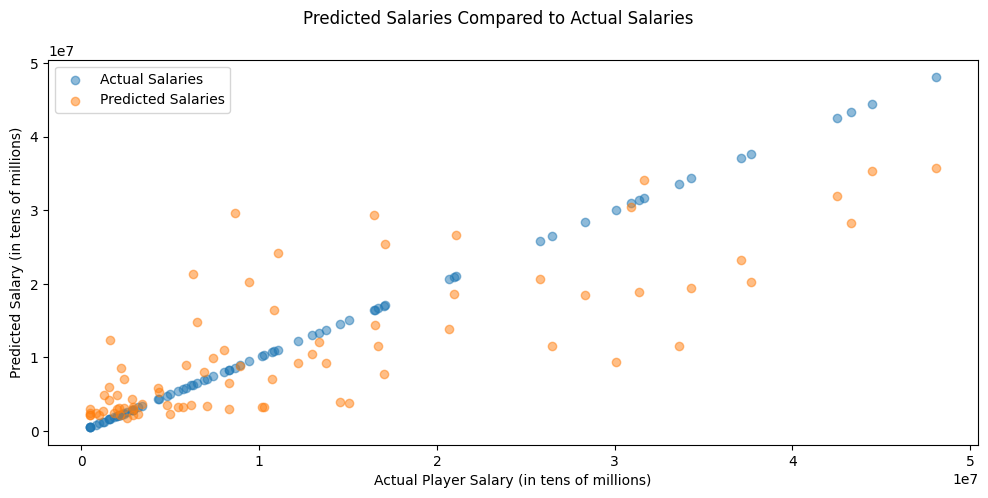

In [29]:
import matplotlib.pyplot as plt

# Set the style to 'default' or another style of your choice
plt.style.use('default')

plt.scatter(pd.Series(y_test), pd.Series(y_test), label='Actual Salaries', alpha=0.5)
plt.scatter(pd.Series(y_test), pd.Series(y_pred_rf), label='Predicted Salaries', alpha=0.5)
plt.suptitle('Predicted Salaries Compared to Actual Salaries')
plt.xlabel('Actual Player Salary (in tens of millions)')
plt.ylabel('Predicted Salary (in tens of millions)')
plt.legend()
plt.gcf().set_size_inches(12, 5)

# Optional: Make the axis spines more prominent
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

plt.show()


In [30]:
# Find mean absolute error
errors = abs(y_pred_rf - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')

Mean Absolute Error: 5671355.89 dollars.


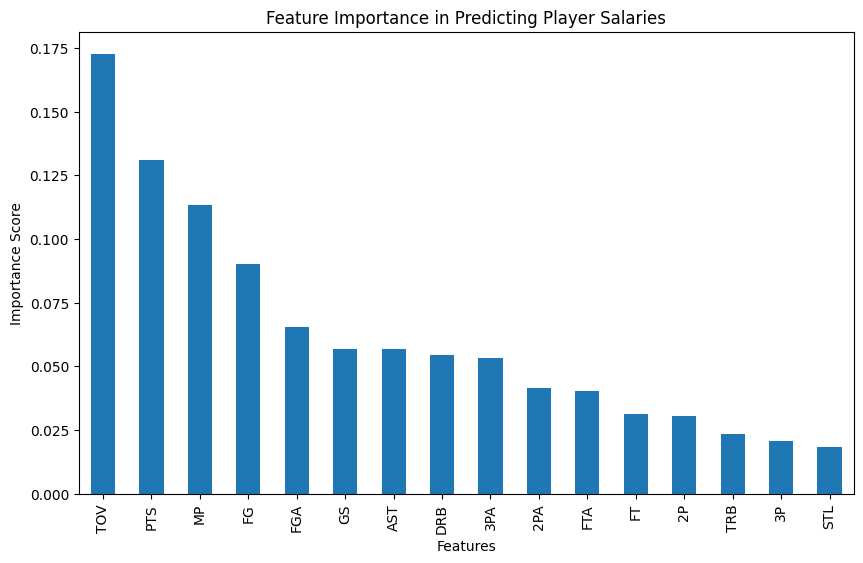

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Remember'grid_search' is our GridSearchCV instance for Random Forest Regressor
# Retrieve the best estimator (fitted model) from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Now, we use 'best_rf_model' to access feature importances
feature_importances = best_rf_model.feature_importances_

# Remember 'x_feat_list' is the list of feature names used in the model
features = pd.Index(x_feat_list)

# Create a pandas series to associate feature names with their importance scores
importances = pd.Series(feature_importances, index=features)

# Sort the feature importances in descending order
sorted_importances = importances.sort_values(ascending=False)

# Plot the feature importances
plt.style.use('default')
plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.title('Feature Importance in Predicting Player Salaries')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()


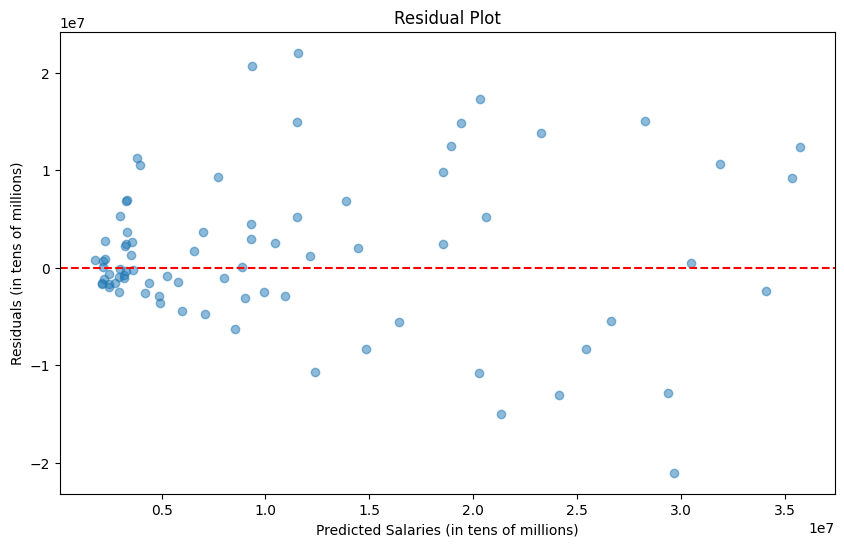

In [32]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred_rf

plt.style.use('default')
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Salaries (in tens of millions)')
plt.ylabel('Residuals (in tens of millions)')
plt.show()


In [33]:
# remember y_pred_rf' contains our predictions
# remember 'x_test' now contains the original indices from 'nba_salaries_df'

# Create a DataFrame with actual and predicted salaries, and calculate the difference
predictions_df = pd.DataFrame({
    'Player Name': nba_salaries_df.loc[x_test.index, 'Player Name'],
    'Actual Salary': y_test,
    'Predicted Salary': y_pred_rf,
})

predictions_df['Salary Difference'] = predictions_df['Actual Salary'] - predictions_df['Predicted Salary']

# Overpaid players: Actual Salary > Predicted Salary (Positive difference indicates being paid more than predicted)
overpaid_players = predictions_df.sort_values(by='Salary Difference', ascending=False).head(10)

# Underpaid players: Actual Salary < Predicted Salary (Negative difference indicates being paid less than predicted)
underpaid_players = predictions_df.sort_values(by='Salary Difference').head(10)

print("Potentially Overpaid Players (Being paid more than model predicts):")
print(overpaid_players)

print("\nPotentially Underpaid Players (Being paid less than model predicts):")
print(underpaid_players)




Potentially Overpaid Players (Being paid more than model predicts):
         Player Name  Actual Salary  Predicted Salary  Salary Difference
26    Andrew Wiggins       33616770      1.156440e+07       2.205237e+07
40    Gordon Hayward       30075000      9.339194e+06       2.073581e+07
15      Jimmy Butler       37653300      2.030666e+07       1.734664e+07
5       Bradley Beal       43279250      2.823873e+07       1.504052e+07
46        Al Horford       26500000      1.153570e+07       1.496430e+07
23      Jrue Holiday       34319520      1.942850e+07       1.489102e+07
19       Zach LaVine       37096500      2.324537e+07       1.385113e+07
32  D'Angelo Russell       31377750      1.891984e+07       1.245791e+07
0      Stephen Curry       48070014      3.569414e+07       1.237588e+07
84       Will Barton       15059712      3.825856e+06       1.123386e+07

Potentially Underpaid Players (Being paid less than model predicts):
         Player Name  Actual Salary  Predicted Salary  Sala

In [34]:
# Calculate the absolute difference between actual and predicted salaries
predictions_df['Absolute Salary Difference'] = predictions_df['Salary Difference'].abs()

# Find players with the closest predicted salaries to their actual salaries
# Sort by 'Absolute Salary Difference' in ascending order to get players with the smallest differences
closely_predicted_players = predictions_df.sort_values(by='Absolute Salary Difference').head(10)

print("Players with Closely Predicted Salaries:")
print(closely_predicted_players)


Players with Closely Predicted Salaries:
                 Player Name  Actual Salary  Predicted Salary  \
300            Peyton Watson        2193960      2.167248e+06   
136            Grayson Allen        8925000      8.884540e+06   
255                Kai Jones        2909040      3.008565e+06   
240              Chuma Okeke        3433320      3.630984e+06   
264          Bismack Biyombo        2905851      3.293528e+06   
34   Shai Gilgeous-Alexander       30913750      3.046454e+07   
344         Ryan Arcidiacono        1836090      2.466000e+06   
256            Blake Griffin        2905851      2.172886e+06   
279           Isaiah Jackson        2573760      1.797855e+06   
286         Josh Christopher        2372160      3.171744e+06   

     Salary Difference  Absolute Salary Difference  
300       26711.562732                26711.562732  
136       40460.015071                40460.015071  
255      -99525.239155                99525.239155  
240     -197663.952478         